In [14]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the data
data = pd.read_excel("./data/Dengue_2001-2024.xlsx")

data_endemic = data[data['Year'] > 2018]

data_endemic.set_index('Year')

,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death
Year,,,,,,,,,,,,
2019,164915055,1267,62898601,102016453,34.71,18.46,153.08,2021.150,72.50,26.36,101354,179
2020,166298024,1278,64856229,101441794,34.82,19.48,160.00,2186.480,74.83,26.24,1193,3
2021,167841460,1289,66800901,101040559,35.40,19.06,156.08,2284.230,71.92,26.78,28429,105
2022,169384897,1301,68770268,100614628,33.09,20.20,114.25,2284.230,73.00,27.00,62382,281
2023,171466990,1317,70815866,100651123,38.33,21.11,241.57,2284.232,64.00,30.00,321179,1705
2024,173562364,1333,72896192,100666171,32.78,26.11,350.00,2284.232,75.00,29.44,101214,575


In [15]:
# Drop the 'Year' column and describe the data
description = data_endemic.drop(columns=['Year']).describe()

# Round the non-population columns to 2 decimal places
description.loc[:, description.columns.difference(['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death'])] = description.loc[:, description.columns.difference(['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death'])].round(2)

# Ensure population columns are integers
description[['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death']] = description[['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death']].astype(int)

description

,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death
count,6,6,6,6,6.00,6.00,6.00,6.00,6.00,6.00,6,6
mean,168911465,1297,67839676,101071788,34.86,20.74,195.83,2224.09,71.88,27.64,102625,474
std,3235181,24,3733263,562272,1.99,2.79,86.26,106.83,4.05,1.65,114177,633
min,164915055,1267,62898601,100614628,32.78,18.46,114.25,2021.15,64.00,26.24,1193,3
25%,166683883,1280,65342397,100654885,33.50,19.16,153.83,2210.92,72.06,26.46,36917,123
50%,168613178,1295,67785584,100853365,34.76,19.84,158.04,2284.23,72.75,26.89,81798,230
75%,170946466,1313,70304466,101341485,35.25,20.88,221.18,2284.23,74.37,28.83,101319,501
max,173562364,1333,72896192,102016453,38.33,26.11,350.00,2284.23,75.00,30.00,321179,1705


In [16]:
data_endemic = data_endemic.set_index('Year')

data_endemic

,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death
Year,,,,,,,,,,,,
2019,164915055,1267,62898601,102016453,34.71,18.46,153.08,2021.150,72.50,26.36,101354,179
2020,166298024,1278,64856229,101441794,34.82,19.48,160.00,2186.480,74.83,26.24,1193,3
2021,167841460,1289,66800901,101040559,35.40,19.06,156.08,2284.230,71.92,26.78,28429,105
2022,169384897,1301,68770268,100614628,33.09,20.20,114.25,2284.230,73.00,27.00,62382,281
2023,171466990,1317,70815866,100651123,38.33,21.11,241.57,2284.232,64.00,30.00,321179,1705
2024,173562364,1333,72896192,100666171,32.78,26.11,350.00,2284.232,75.00,29.44,101214,575


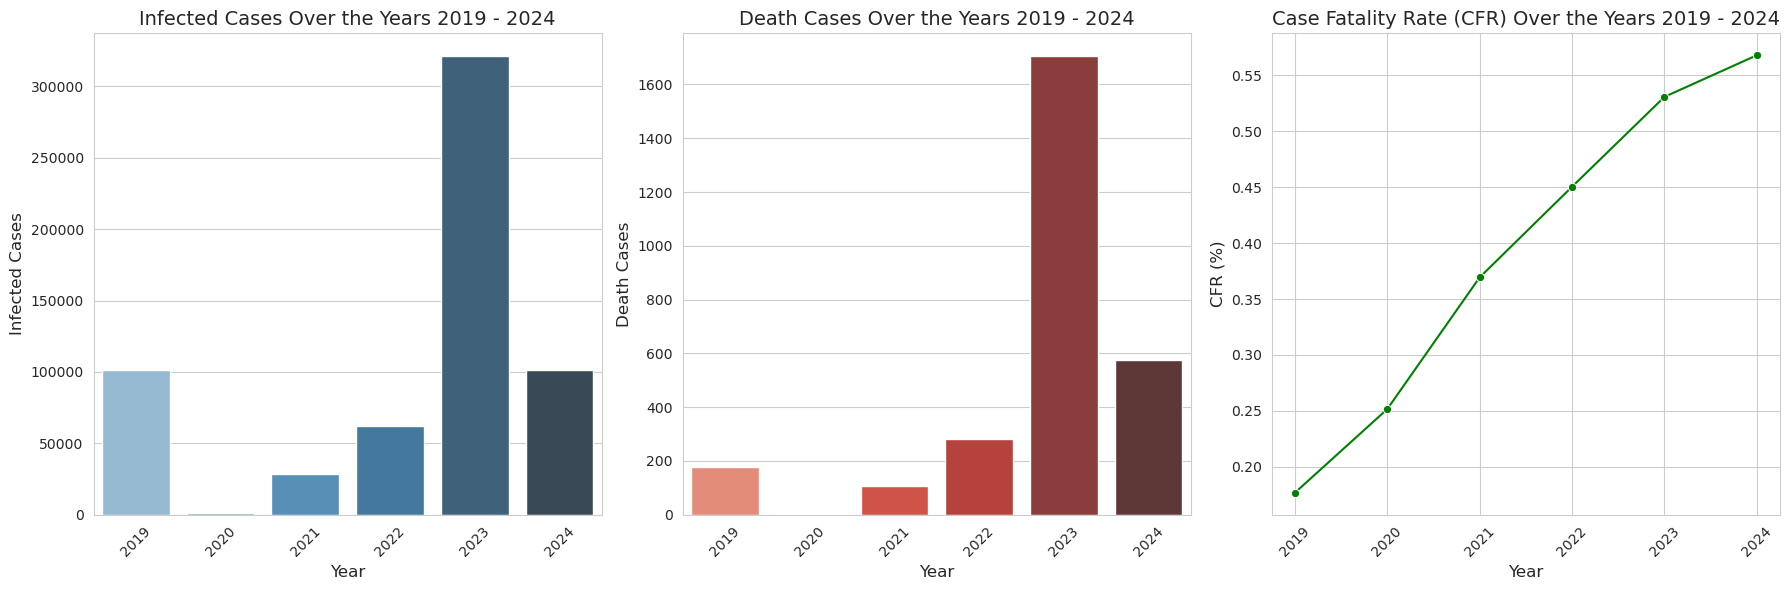

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data by calculating CFR if not already done
data_endemic['CFR'] = (data_endemic['Death'] / data_endemic['Infected']) * 100

# Create a figure with 3 subplots for Infected, Death, and CFR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Infected cases
sns.barplot(data=data_endemic.reset_index(), x='Year', y='Infected', palette='Blues_d', ax=axes[0])
axes[0].set_title('Infected Cases Over the Years 2019 - 2024', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Infected Cases', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Death cases
sns.barplot(data=data_endemic.reset_index(), x='Year', y='Death', palette='Reds_d', ax=axes[1])
axes[1].set_title('Death Cases Over the Years 2019 - 2024', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Death Cases', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Line plot for CFR
sns.lineplot(data=data_endemic.reset_index(), x='Year', y='CFR', marker='o', color='green', ax=axes[2])
axes[2].set_title('Case Fatality Rate (CFR) Over the Years 2019 - 2024', fontsize=14)
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('CFR (%)', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()


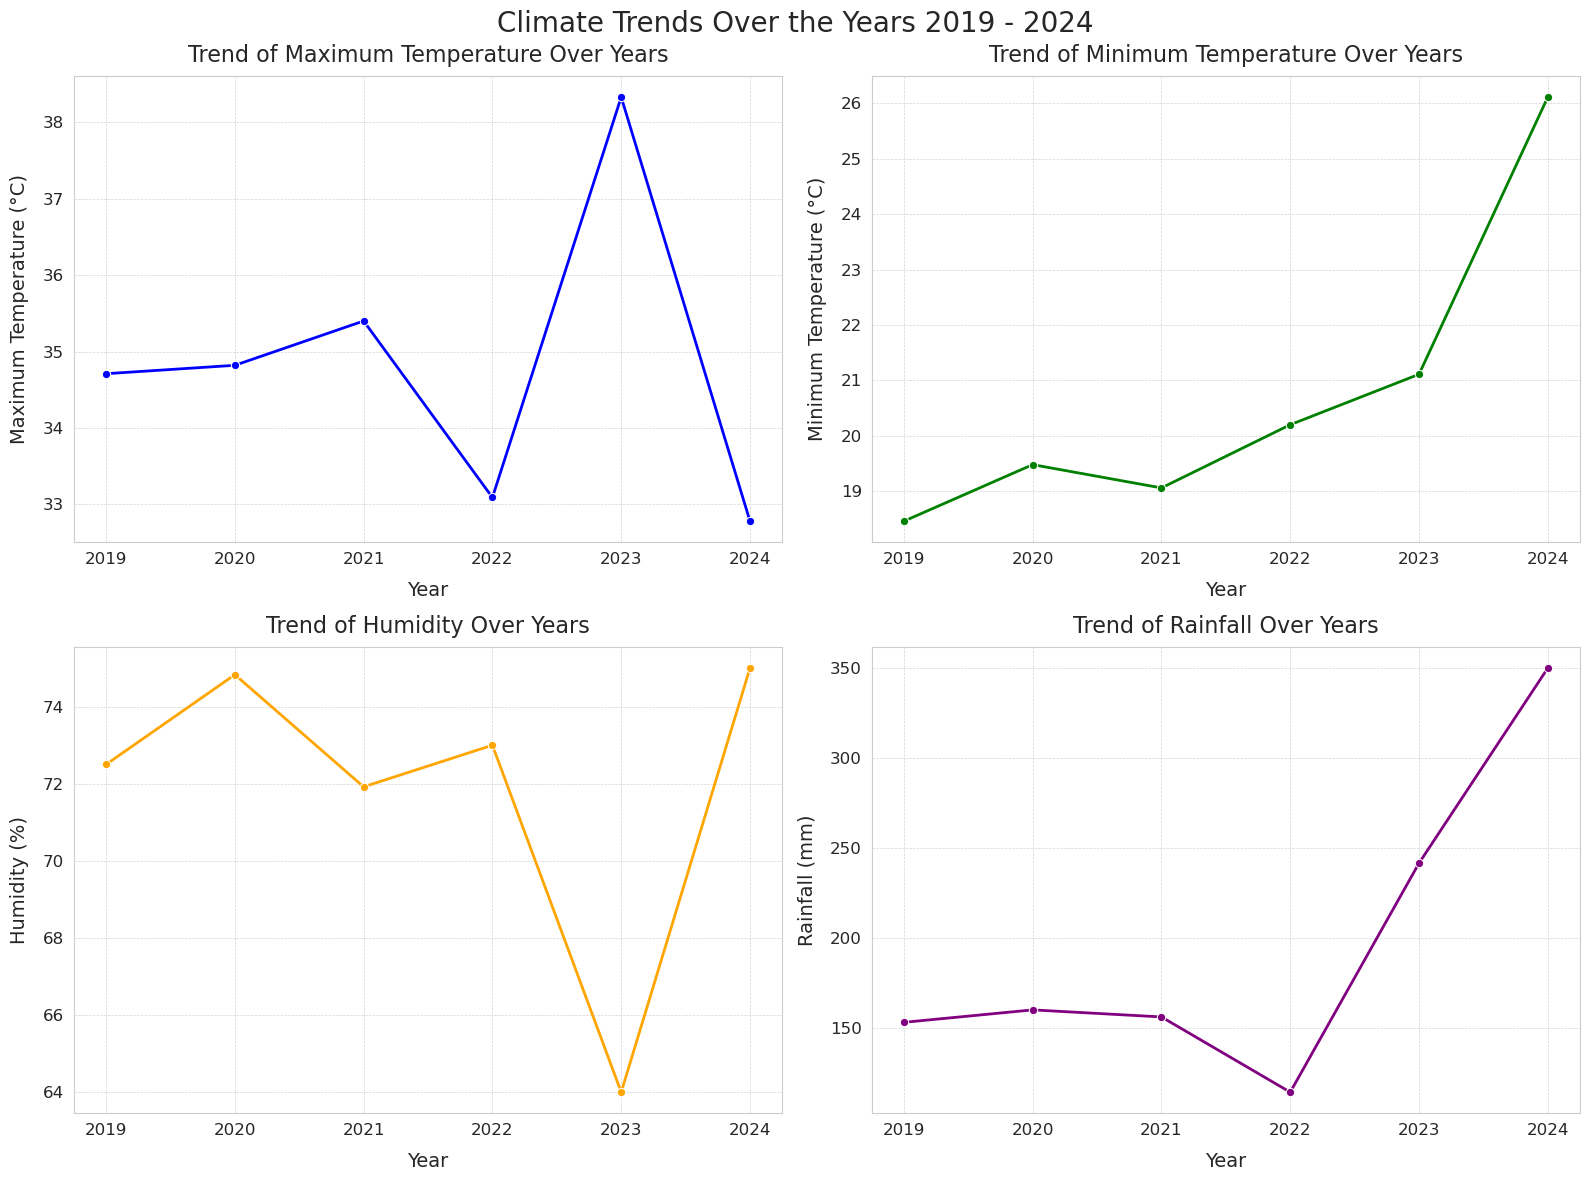

In [18]:
# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set a consistent style
sns.set_style('whitegrid')

# Plot Max T trend
sns.lineplot(
    ax=axes[0, 0],
    x='Year',
    y='Tmax',
    data=data_endemic.reset_index(),
    color='blue',
    marker='o',
    linewidth=2
)
axes[0, 0].set_title('Trend of Maximum Temperature Over Years', fontsize=16, pad=10)
axes[0, 0].set_xlabel('Year', fontsize=14, labelpad=10)
axes[0, 0].set_ylabel('Maximum Temperature (°C)', fontsize=14, labelpad=10)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)
axes[0, 0].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[0, 0].set_xticks(range(2019, 2025, 1))

# Plot Min T trend
sns.lineplot(
    ax=axes[0, 1],
    x='Year',
    y='Tmin',
    data=data_endemic.reset_index(),
    color='green',
    marker='o',
    linewidth=2
)
axes[0, 1].set_title('Trend of Minimum Temperature Over Years', fontsize=16, pad=10)
axes[0, 1].set_xlabel('Year', fontsize=14, labelpad=10)
axes[0, 1].set_ylabel('Minimum Temperature (°C)', fontsize=14, labelpad=10)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)
axes[0, 1].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[0, 1].set_xticks(range(2019, 2025, 1))

# Plot Humidity trend
sns.lineplot(
    ax=axes[1, 0],
    x='Year',
    y='Relative Humidity',
    data=data_endemic.reset_index(),
    color='orange',
    marker='o',
    linewidth=2
)
axes[1, 0].set_title('Trend of Humidity Over Years', fontsize=16, pad=10)
axes[1, 0].set_xlabel('Year', fontsize=14, labelpad=10)
axes[1, 0].set_ylabel('Humidity (%)', fontsize=14, labelpad=10)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)
axes[1, 0].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[1, 0].set_xticks(range(2019, 2025, 1))

# Plot Rainfall trend
sns.lineplot(
    ax=axes[1, 1],
    x='Year',
    y='Rainfall',
    data=data_endemic.reset_index(),
    color='purple',
    marker='o',
    linewidth=2
)
axes[1, 1].set_title('Trend of Rainfall Over Years', fontsize=16, pad=10)
axes[1, 1].set_xlabel('Year', fontsize=14, labelpad=10)
axes[1, 1].set_ylabel('Rainfall (mm)', fontsize=14, labelpad=10)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)
axes[1, 1].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[1, 1].set_xticks(range(2019, 2025, 1))

plt.suptitle('Climate Trends Over the Years 2019 - 2024', fontsize=20)

# Adjust layout for better display
plt.tight_layout()

# Display the plots
plt.show()


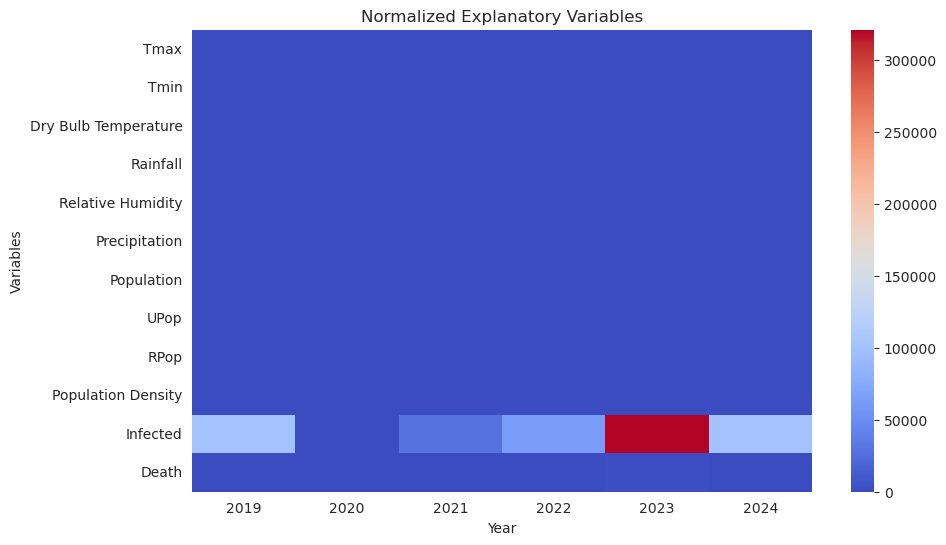

In [19]:
# Normalize the data
normalized_data = data_endemic[
    [
        "Tmax",
        "Tmin",
        "Dry Bulb Temperature",
        "Rainfall",
        "Relative Humidity",
        "Precipitation",
        "Population",
        "UPop",
        "RPop",
        "Population Density",
    ]
].apply(pd.to_numeric)

# Standardize the data
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Clip extreme values to improve visualization
normalized_data = normalized_data.clip(lower=-3, upper=3)

# Add the Infected and Death columns back for comparison
normalized_data["Infected"] = data_endemic["Infected"]
normalized_data["Death"] = data_endemic["Death"]

# Display the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of Explanatory Variables and Infections (2019 - 2024)')

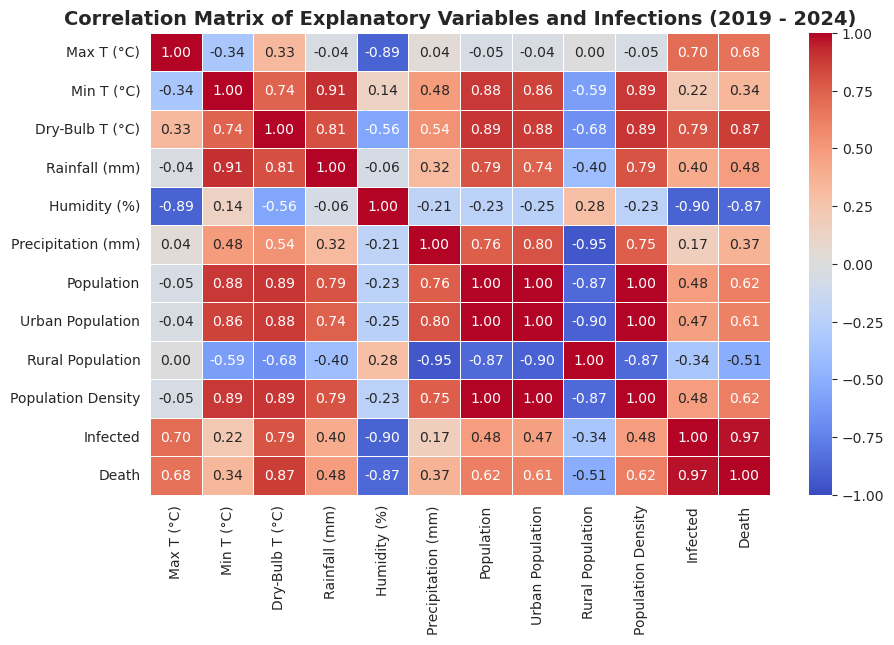

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the mapping for axis label updates
axis_label_map = {
    "Tmax": "Max T (°C)",
    "Tmin": "Min T (°C)",
    "Dry Bulb Temperature": "Dry-Bulb T (°C)",
    "Rainfall": "Rainfall (mm)",
    "Relative Humidity": "Humidity (%)",
    "Precipitation": "Precipitation (mm)",
    "RPop": "Rural Population",
    "UPop": "Urban Population",
    "Population Density": "Population Density"
}

# Step 2: Update correlation matrix labels
correlation_matrix = normalized_data.corr()
correlation_matrix.rename(index=axis_label_map, columns=axis_label_map, inplace=True)

# Step 3: Plot the updated correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Explanatory Variables and Infections (2019 - 2024)", fontsize=14, fontweight="bold")

In [21]:
normalized_data

,Tmax,Tmin,Dry Bulb Temperature,Rainfall,Relative Humidity,Precipitation,Population,UPop,RPop,Population Density,Infected,Death
Year,,,,,,,,,,,,
2019,-0.072836,-0.816500,-0.775316,-0.495573,0.154172,-1.899614,-1.235297,-1.323527,1.680084,-1.237855,101354,179
2020,-0.017581,-0.450689,-0.848191,-0.415354,0.728923,-0.352065,-0.807819,-0.799153,0.658055,-0.791415,1193,3
2021,0.273764,-0.601317,-0.520251,-0.460796,0.011100,0.562911,-0.330740,-0.278249,-0.055541,-0.344976,28429,105
2022,-0.886593,-0.192469,-0.386646,-0.945703,0.277509,0.562911,0.146339,0.249270,-0.813058,0.142049,62382,281
2023,1.745559,0.133892,1.435245,0.530234,-1.942562,0.562929,0.789917,0.797209,-0.748152,0.791415,321179,1705
2024,-1.042312,1.927084,1.095159,1.787192,0.770858,0.562929,1.437601,1.354449,-0.721389,1.440782,101214,575


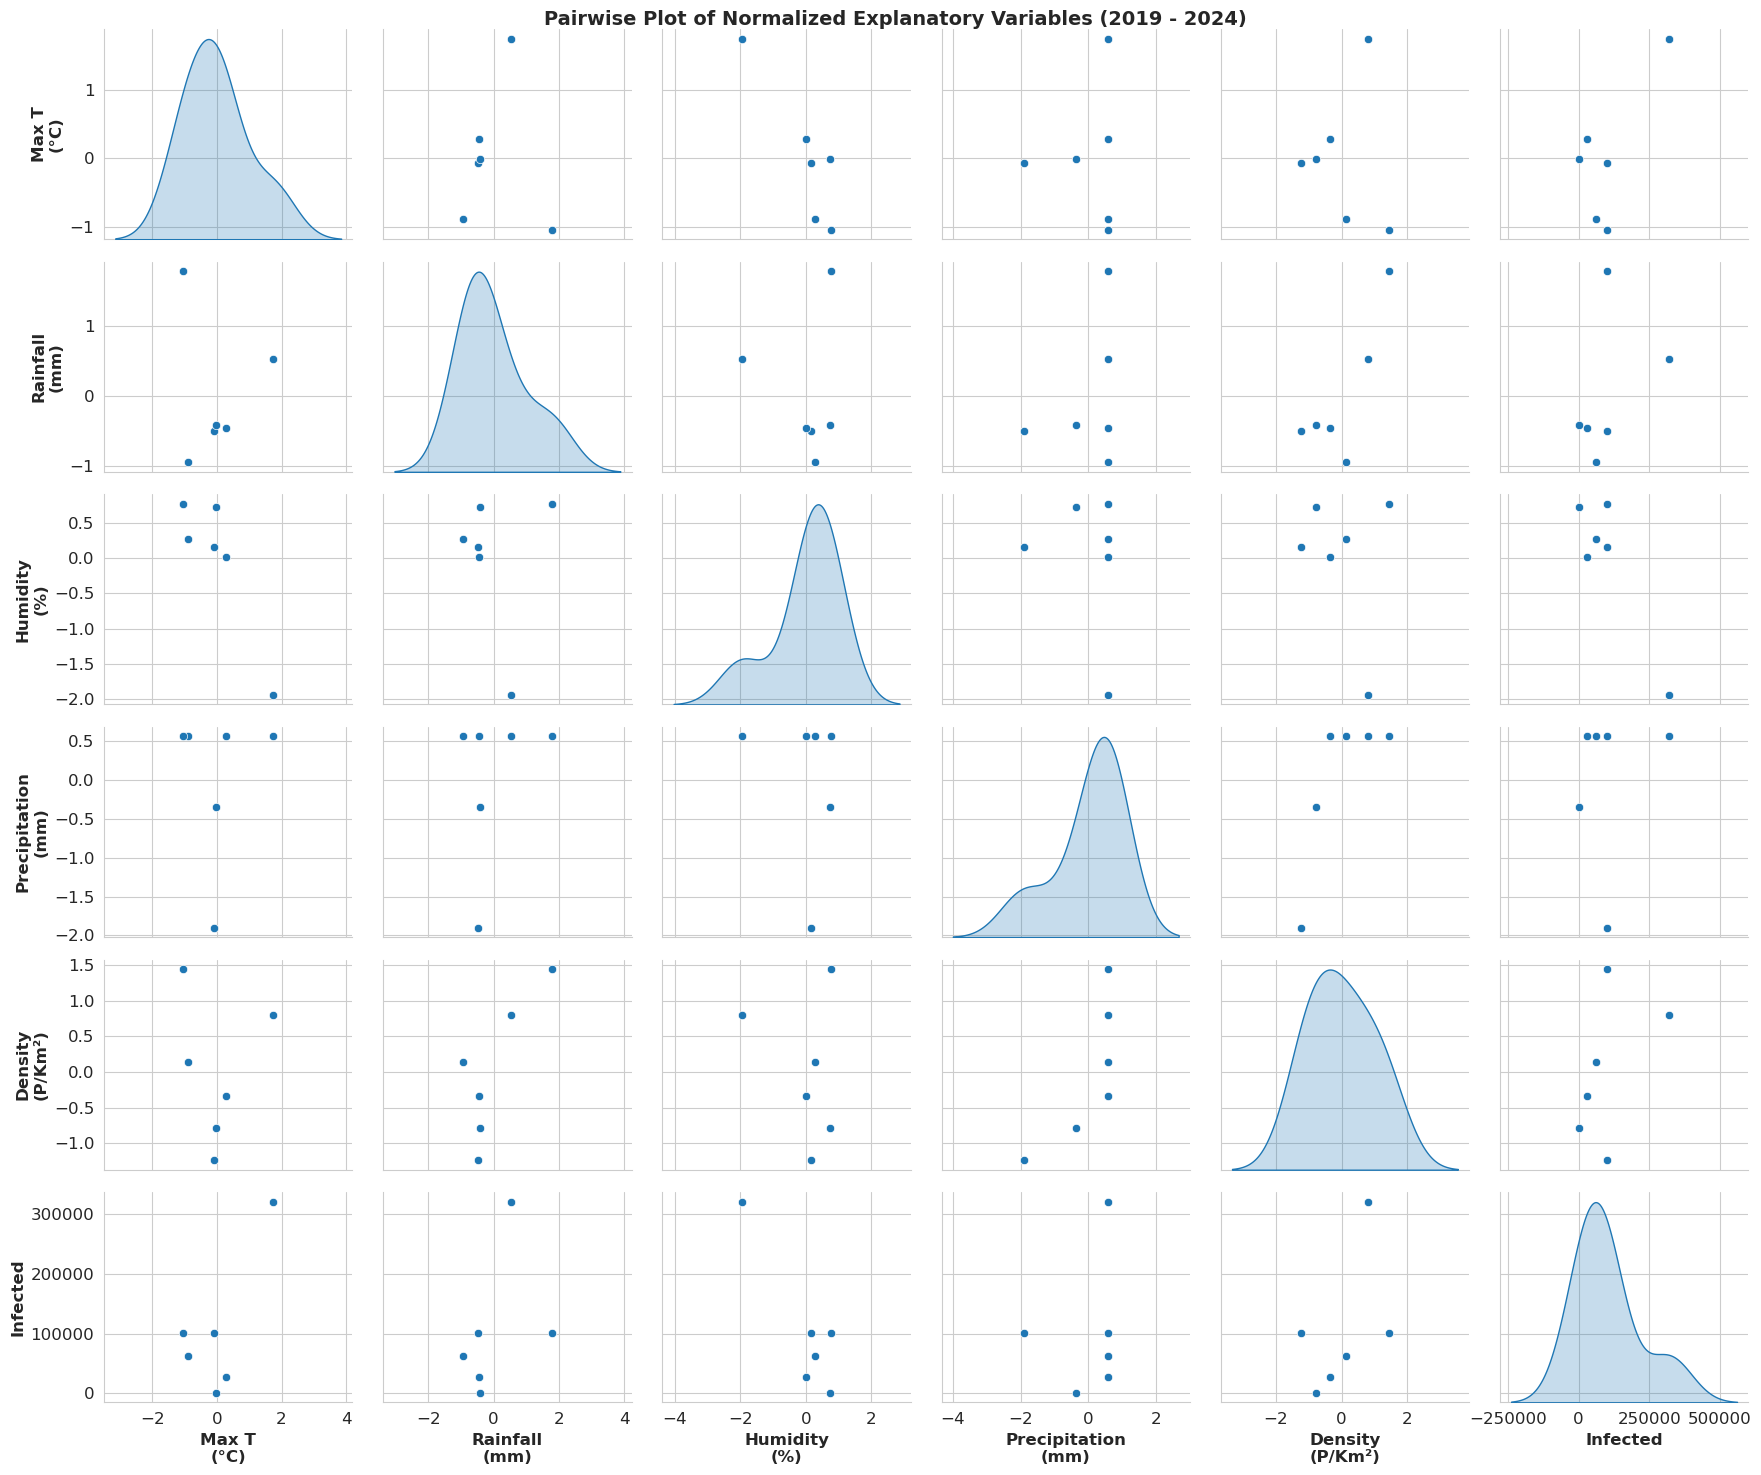

In [31]:
normalized_data = normalized_data[
    [
        "Tmax",
        "Rainfall",
        "Relative Humidity",
        "Precipitation",
        "Population Density",
        "Infected",
    ]
]

# Create the pairplot
pairplot = sns.pairplot(
    normalized_data, kind="scatter", diag_kind="kde", height=2.5, aspect=1.2
)

# Define a dictionary to update axis labels
axis_label_map = {
    "Tmax": "Max T\n(°C)",
    "Rainfall": "Rainfall\n(mm)",
    "Relative Humidity": "Humidity\n(%)",
    "Precipitation": "Precipitation\n(mm)",
    "Population Density": "Density\n(P/Km²)",
    "Infected": "Infected",
}

# Update axis labels in the pairplot
for ax_row in pairplot.axes:
    for ax in ax_row:
        if ax:  # Check if axis exists
            x_label = ax.get_xlabel()
            y_label = ax.get_ylabel()
            # Update x-axis label if in the map
            if x_label and x_label in axis_label_map:
                ax.set_xlabel(axis_label_map[x_label])
            # Update y-axis label if in the map
            if y_label and y_label in axis_label_map:
                ax.set_ylabel(axis_label_map[y_label])

# # adjust axis limits only for the diagonal plots
# for ax in pairplot.diag_axes:
#     ax.set_xlim(-1, 1)
#     ax.set_ylim(0, 0.5)

for ax in pairplot.axes.flatten():
    if ax:  # Check if axis exists
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight="bold")
        ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight="bold")
        ax.tick_params(axis="both", labelsize=12)  # Increase tick label size

# Add a main title
plt.suptitle(
    "Pairwise Plot of Normalized Explanatory Variables (2019 - 2024)",
    fontsize=14,
    fontweight="bold",
)

# Adjust layout for better display
plt.tight_layout()

# Display the pairplot
plt.show()

<Figure size 1200x800 with 0 Axes>

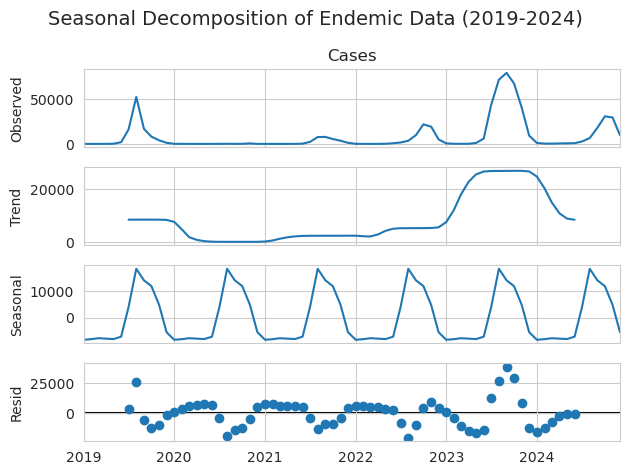

In [9]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the data
file_path = "./data/Monthly_Infection_2001-2024.xlsx"
data = pd.read_excel(file_path)

# Reshaping the dataset into long format
data_long = data.melt(id_vars=['Year'], 
                      value_vars=['January', 'February', 'March', 'April', 'May', 'June', 
                                  'July', 'August', 'September', 'October', 'November', 'December'],
                      var_name='Month', value_name='Cases')

# Mapping month names to numerical values for time series compatibility
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data_long['Month'] = data_long['Month'].map(month_mapping)

# Creating a datetime column
data_long['Date'] = pd.to_datetime(data_long[['Year', 'Month']].assign(Day=1))

# Sorting data by date
data_long.sort_values('Date', inplace=True)

# Splitting the data into epidemic and endemic periods
data_epidemic_monthly = data_long[data_long['Year'] <= 2018].set_index('Date')
data_endemic_monthly = data_long[data_long['Year'] > 2018].set_index('Date')

# Performing seasonal decomposition for epidemic period
decomposition_epidemic = seasonal_decompose(data_epidemic_monthly['Cases'], model='additive', period=12)

# Performing seasonal decomposition for endemic period
decomposition_endemic = seasonal_decompose(data_endemic_monthly['Cases'], model='additive', period=12)

# Plotting the decomposition for the endemic data
plt.figure(figsize=(12, 8))
decomposition_endemic.plot()
plt.suptitle('Seasonal Decomposition of Endemic Data (2019-2024)', fontsize=14)

# Label the y-axis of the first plot
plt.gcf().axes[0].set_ylabel('Observed')

plt.tight_layout()
plt.show()
